In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy
from scipy.signal import find_peaks

from matplotlib import colors
from matplotlib import ticker

from sklearn.svm import OneClassSVM

# Waveform selection

- find peak and isolate the waveform

In [2]:
def quick_plot(data, title, axis):
    if len(data)==0:
        axis.plot(data.transpose())
    else:
        for wf in data:
            axis.plot(wf.transpose())
    axis.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    axis.set_ylabel(r"$\mathrm{\bf ADC\ counts}$")
    axis.set_title(title);

# Data engineering, feature extraction

- for now we do nothing

we may want to extract features of the waveforms like
 - mean, std, skewness...
 - peak amplitude, rise time, fall time, pulse width...
 => i.e. instead of a vector of size ≈300, we will have a few 10's [mean, srd, peak amplitude ...]

OR
 - build a network that looks for the features by itself

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# # Define the model
# model = tf.keras.Sequential([
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
#     MaxPooling1D(pool_size=2),
#     Conv1D(filters=64, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(10,  
#  activation='softmax')  # Adjust output units based on your task
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  


# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val,  
#  y_val))

# import tensorflow as tf
# from sklearn.svm import OneClassSVM

# # 1. Train the CNN
# # ... (Build and train the CNN as described above)

# # 2. Extract Features
# def extract_features(model, X_test):
#     feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
#     features = feature_extractor.predict(X_test)
#     return features

# # 3. Train the One-Class SVM
# ocsvm = OneClassSVM(nu=0.1, kernel='rbf')
# ocsvm.fit(features_train)

# # 4. Anomaly Detection
# new_features = extract_features(model, X_test)
# anomaly_scores = ocsvm.decision_function(new_features)
# anomalies = new_features[anomaly_scores < threshold]

In [ ]:
# def extract_features(waveform):
#     mean = np.mean(waveform)
#     std = np.std(waveform)
#     # Skewness
#     # Kurtosis
#     # Minimum
#     # Maximum
#     # Median
#     # IQR #Interquartile Range

#     PearkAmplitude = 
#     RiseTime = 
#     FallTime = 
#     PulseWidth = 




# Mean
# Standard deviation
# Skewness
# Kurtosis
# Minimum
# Maximum
# Range
# Median
# Interquartile Range (IQR)

In [24]:
trainSample = pd.read_pickle('cosmics-1.pkl')

In [34]:
# trainSample['waveform'][0]

In [60]:
def calculate_rise_time(waveform, time_interval=1, threshold_low=10, threshold_high=90):
  """Calculates the rise time of a waveform.

  Args:
    waveform: A numpy array representing the waveform.
    time_array: A numpy array representing the time corresponding to each waveform point.
    threshold_low: The lower threshold percentage (default: 10%).
    threshold_high: The upper threshold percentage (default: 90%).

  Returns:
    The rise time in the same units as the time_array.
  """

  # Calculate the thresholds
  min_val = np.min(waveform)
  max_val = np.max(waveform)
  threshold_low_val = min_val + threshold_low/100 * (max_val - min_val)
  threshold_high_val = min_val + threshold_high/100 * (max_val - min_val)

  # Find the indices of the threshold crossings
  idx_low = np.argmin(np.abs(waveform - threshold_low_val))
  idx_high = np.argmin(np.abs(waveform - threshold_high_val))

  # Calculate rise time in units of time_interval
  rise_time = (idx_high - idx_low) * time_interval

  return rise_time

def calculate_fall_time(waveform, time_interval=1):
    # Calculate the thresholds
    min_val = np.min(waveform)
    max_val = np.max(waveform)
    threshold_low_val = min_val + 90/100 * (max_val - min_val)
    threshold_high_val = min_val + 10/100 * (max_val - min_val)

    # Find the indices of the threshold crossings
    idx_low = np.argmin(np.abs(waveform - threshold_low_val))
    idx_high = np.argmin(np.abs(waveform - threshold_high_val))

    # Calculate the fall time in units of time_interval
    fall_time = (idx_low - idx_high) * time_interval

    return fall_time

def calculate_pulse_width(waveform, time_interval=1, threshold=50):
    # Find the indices where the waveform crosses the threshold
    idx_start = np.argmin(np.abs(waveform - threshold))
    idx_end = np.argmax(np.abs(waveform - threshold)) + 1  # Add 1 to include the peak

    # Calculate the pulse width in units of time_interval
    pulse_width = (idx_end - idx_start) * time_interval

    return pulse_width

def calculate_rise_time_gradient(waveform, time_interval=1, threshold=10):
    # Calculate the gradient
    gradient = np.gradient(waveform)
    print(gradient[10:30])

    # Find the start and end indices of the rising edge
    start_idx = np.argmax(gradient > threshold)
    end_idx = np.argmax(gradient < 0) + start_idx

    # Calculate the rise time
    rise_time = (end_idx - start_idx) * time_interval

    return rise_time

-132
[-8.5000e+00 -2.5000e+00  4.0000e+00  4.0000e+00 -3.5000e+00 -9.0000e+00
 -6.5000e+00  1.0000e+00  8.0000e+00  1.2000e+01 -2.0000e+00 -1.4500e+01
 -1.0000e+00  7.0000e+00  1.3500e+01  1.5600e+02  5.2050e+02  9.8100e+02
  1.2945e+03  1.2960e+03]
0
-132
37


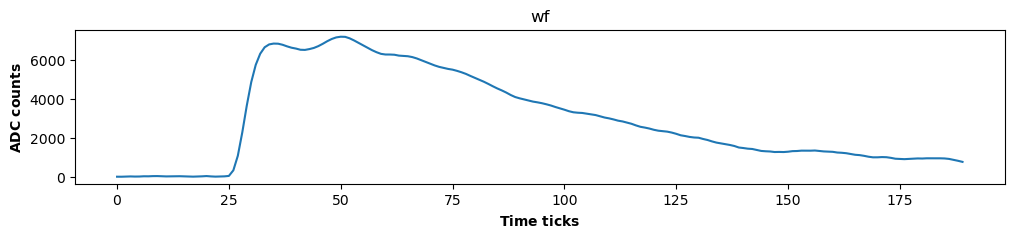

In [62]:
evt = 2
waveform = trainSample['waveform'][evt]
print( calculate_rise_time(waveform, time_interval=1, threshold_low=10, threshold_high=90) )
print( calculate_rise_time_gradient(waveform, time_interval=1, threshold=0) )
print( calculate_fall_time(waveform, time_interval=1) )
print( calculate_pulse_width(waveform, time_interval=1, threshold=20) )

fig, axs = plt.subplots(1, 1, figsize=(12, 2))
quick_plot(trainSample['waveform'][evt:evt+1], 'wf', axs)


# One-Class SVM (OSVM)

### training/testing

- use a fraction of the cosmics to train (TBD)
- use another part to evaluate the performance 
- look at what happens in the nueutron sample (should have some outliers)
- look at what happens in the nueutron SB sample (should have no outliers)

=> find out the right size for the training sample 

 -> start small, increase until it doesn't change anything when we add more events


## Training

- SVM is vector based -> all data points should have the same number of features
- we check the max length of the waveforms and add 0 at the end to reach this number
- TODO: think of something more clever: may want to look at the ouliers (values very far from the mean), it may be worth reducing their size...

In [5]:
def make_training_sample(waveforms, verbose=True, nWfs_plot = 20, force_max = -999):
    lengths = [wf.shape[0] for wf in waveforms]
    mean, min, max = np.array(lengths).mean(), np.array(lengths).min(), np.array(lengths).max()
    print(f'mean: {mean:.1f}, min = {min}, max = {max} ')

    if force_max > -999:
        # if we want to make a sample for inference
        # we need to set the maximum to that of the training sample
        print(f'maximum {force_max} is taken from external input')
        max = force_max


    #TODO: what do we do if we have wafeforms with max>force_max (cf. inference)

    X_train = np.array( [ np.concatenate((wf, np.zeros(max-wf.shape[0])), axis=0) for wf in waveforms if (wf.shape[0] < max)] )

    if verbose:
        plt.hist(lengths, bins=10, edgecolor='black');

        fig, axs = plt.subplots(1, 1, figsize=(12, 2))
        quick_plot(waveforms[:nWfs_plot], title='original waveforms', axis =axs)

        fig, axs = plt.subplots(1, 1, figsize=(12, 2))
        quick_plot(X_train[:nWfs_plot], title='waveforms after', axis =axs)

    return X_train, max

    

In [ ]:


# cosmics-1, neutrons_sideBand
trainSample = pd.read_pickle('neutrons_sideBand.pkl')
X_train, max = make_training_sample(trainSample['waveform'], verbose=False, nWfs_plot = 20, force_max = -999)

# from sklearn.decomposition import PCA
# # Standardize the features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() #z = (x - mean) / std (remove the mean and scale to unit variance)
# X_train_scaled = scaler.fit_transform(X_train)

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=100)  
#   # Adjust the number of components as needed
# X_train_pca = pca.fit_transform(X_train_scaled)



mean: 193.4, min = 72, max = 450 


In [ ]:
# Create an OCSVM model
# check documentation for list of kernels and parameters
## https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html
ocsvm = OneClassSVM(nu=0.1, kernel='rbf', verbose=True) 
 
# Train the model
ocsvm.fit(X_tain)

[LibSVM].
*
optimization finished, #iter = 1520
obj = 211485.385801, rho = 345.032110
nSV = 1611, nBSV = 1600


OneClassSVM(nu=0.1, verbose=True)

In [19]:
print("Training sample shape", X_train.shape)
print("Hyperparameters:")
print("nu:", ocsvm.nu)
print("kernel:", ocsvm.kernel)
## more stuff
support_vectors = ocsvm.support_vectors_
print("Number of support vectors:", support_vectors.shape[0])

Training sample shape (16058, 450)
Hyperparameters:
nu: 0.1
kernel: rbf
Number of support vectors: 1611


In [20]:
# # Predict anomalies for a new waveform 'X_test'
# X_test_scaled = scaler.transform(X_test)
# X_test_pca = pca.transform(X_test_scaled)
# y_pred = ocsvm.predict(X_test_pca)

## Validation

In [21]:
def print_info(y_pred, verbose=True):
    # predict: Returns -1 for outliers and 1 for inliers.
    Ntot = y_pred.shape[0]
    Nanomalies = (y_pred == -1).sum()
    if verbose: print(f'total number of waveforms: {Ntot}')
    if verbose: print(f'number of outliers detected: {Nanomalies} -> {Nanomalies*100/Ntot:.2f} %')
    return Ntot, Nanomalies


 cosmics-1
mean: 192.0, min = 83, max = 446 
maximum 450 is taken from external input


/var/folders/m0/kxgmsb_j0nj47w1sjgx1n5hm0000gn/T/ipykernel_10096/3398059940.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(LLH)



 cosmics-2
mean: 194.4, min = 74, max = 448 
maximum 450 is taken from external input


/var/folders/m0/kxgmsb_j0nj47w1sjgx1n5hm0000gn/T/ipykernel_10096/3398059940.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(LLH)



 cosmics-3
mean: 198.1, min = 68, max = 450 
maximum 450 is taken from external input


/var/folders/m0/kxgmsb_j0nj47w1sjgx1n5hm0000gn/T/ipykernel_10096/3398059940.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(LLH)



 cosmics-4
mean: 197.2, min = 75, max = 449 
maximum 450 is taken from external input


/var/folders/m0/kxgmsb_j0nj47w1sjgx1n5hm0000gn/T/ipykernel_10096/3398059940.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(LLH)



 cosmics-5
mean: 196.2, min = 72, max = 449 
maximum 450 is taken from external input


/var/folders/m0/kxgmsb_j0nj47w1sjgx1n5hm0000gn/T/ipykernel_10096/3398059940.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(LLH)


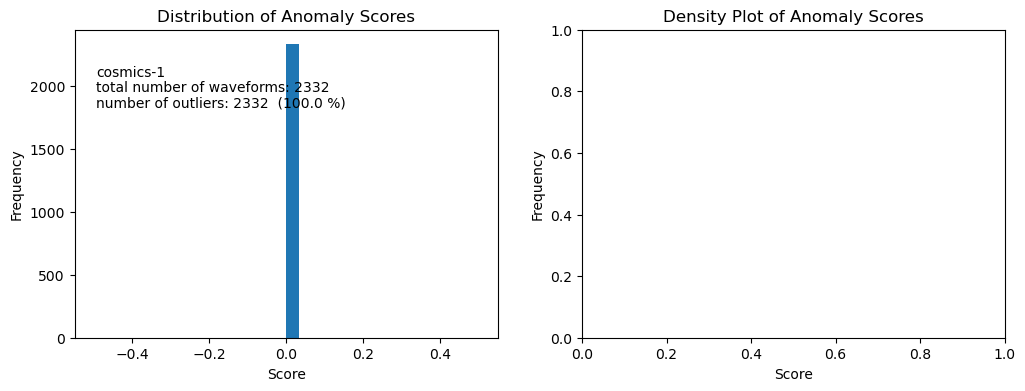

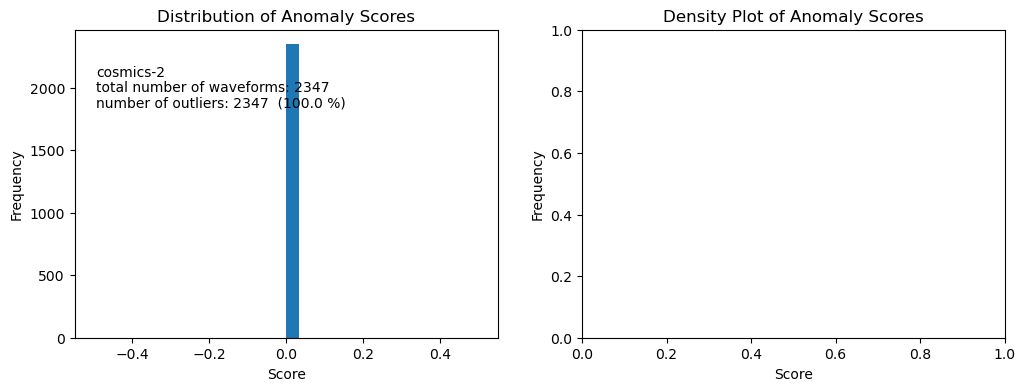

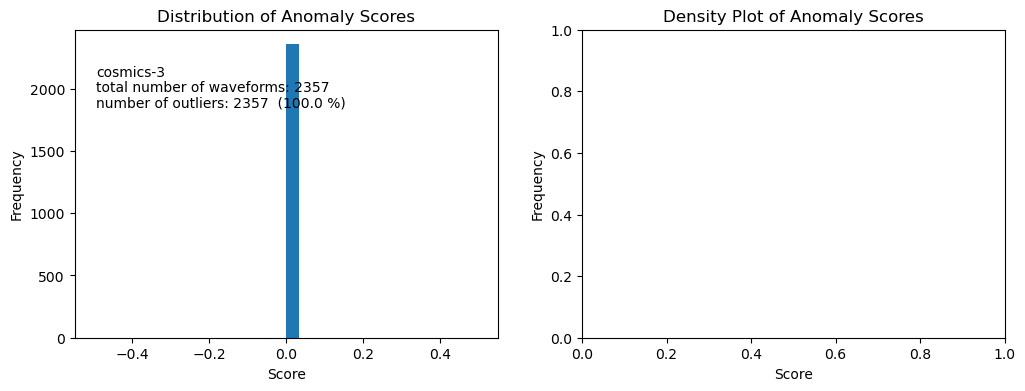

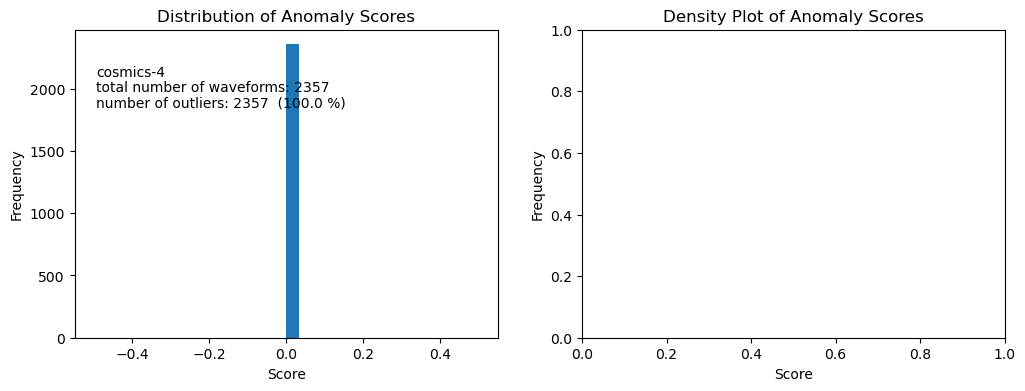

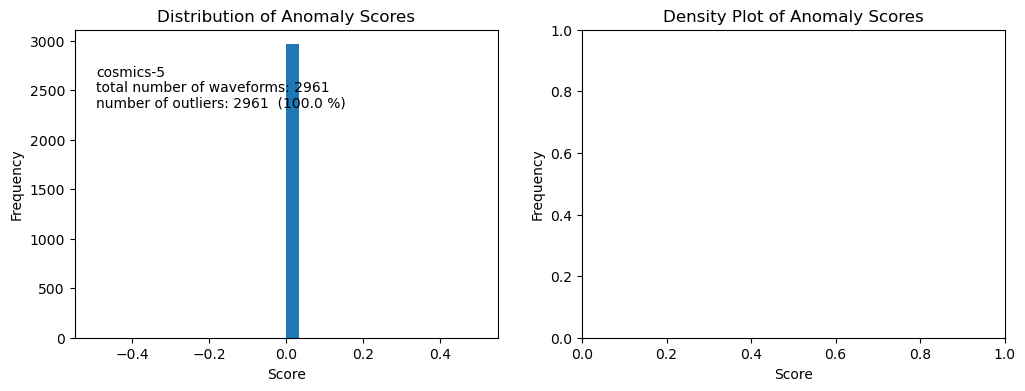

In [22]:
for file in [ 'cosmics-1', 'cosmics-2' ,'cosmics-3', 'cosmics-4', 'cosmics-5' ]: 
    print('\n', file)
    c_test = pd.read_pickle(f'{file}.pkl')
    c_test_vect, _ = make_training_sample(c_test['waveform'], verbose=False, nWfs_plot=20, force_max = max)

    # X_test_scaled = scaler.transform(c_test_vect)
    # X_test_pca = pca.transform(X_test_scaled)
    # c_test_vect = X_test_pca

    # print(c_test_vect.shape)
    y_pred = ocsvm.predict(c_test_vect) 
    Ntot, Nanomalies = print_info(y_pred, False)
    LLH = ocsvm.score_samples(c_test_vect) ## get log-likelihood of a data point under the learned density model
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    ax = axs[0]
    ax.hist(LLH, bins=30)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Anomaly Scores');
    ax.text(0.05, 0.85, f'{file}', transform=ax.transAxes);
    ax.text(0.05, 0.8, f'total number of waveforms: {Ntot}', transform=ax.transAxes);
    ax.text(0.05, 0.75, f'number of outliers: {Nanomalies}  ({Nanomalies*100/Ntot:.1f} %)', transform=ax.transAxes);
    ax = axs[1]
    sns.kdeplot(LLH)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    ax.set_title('Density Plot of Anomaly Scores');



## Inference (on neutron samples)


 neutrons
mean: 208.3, min = 61, max = 450 
maximum 450 is taken from external input
(1714, 450)


/var/folders/m0/kxgmsb_j0nj47w1sjgx1n5hm0000gn/T/ipykernel_10096/1915898994.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(LLH)



 neutrons_sideBand
mean: 193.4, min = 72, max = 450 
maximum 450 is taken from external input
(16058, 450)


/var/folders/m0/kxgmsb_j0nj47w1sjgx1n5hm0000gn/T/ipykernel_10096/1915898994.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(LLH)


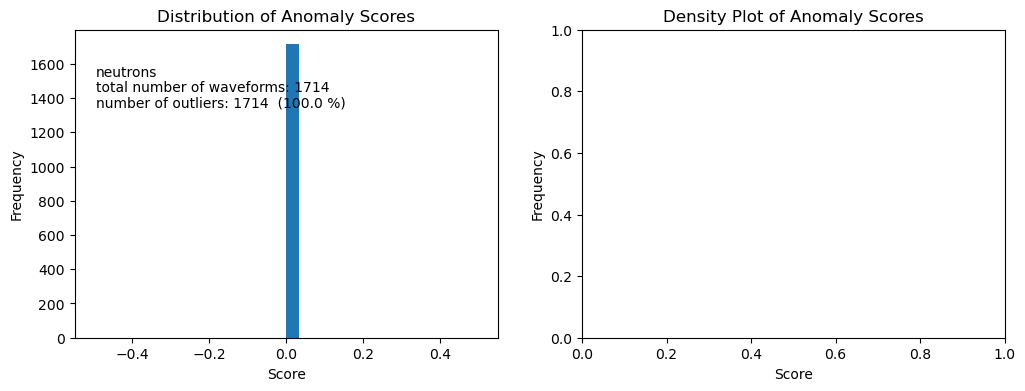

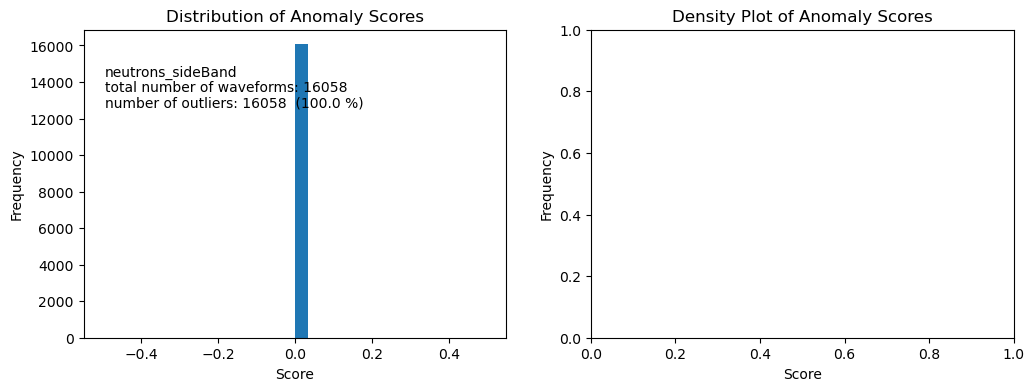

In [23]:
for file in [ 'neutrons', 'neutrons_sideBand']: 
    print('\n', file)
    c_test = pd.read_pickle(f'{file}.pkl')
    c_test_vect, _ = make_training_sample(c_test['waveform'], verbose=False, nWfs_plot=20, force_max = max)
    print(c_test_vect.shape)
    y_pred = ocsvm.predict(c_test_vect) 
    Ntot, Nanomalies = print_info(y_pred, False)
    LLH = ocsvm.score_samples(c_test_vect) ## get log-likelihood of a data point under the learned density model
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    ax = axs[0]
    ax.hist(LLH, bins=30)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Anomaly Scores');
    ax.text(0.05, 0.85, f'{file}', transform=ax.transAxes);
    ax.text(0.05, 0.8, f'total number of waveforms: {Ntot}', transform=ax.transAxes);
    ax.text(0.05, 0.75, f'number of outliers: {Nanomalies}  ({Nanomalies*100/Ntot:.1f} %)', transform=ax.transAxes);
    ax = axs[1]
    sns.kdeplot(LLH)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    ax.set_title('Density Plot of Anomaly Scores');

# Draft: improvements

In [15]:
# file = 'cosmics-1'
# test = pd.read_pickle(f'{file}.pkl')
# waveforms = test['waveform']
# lengths = [wf.shape[0] for wf in waveforms]
# mean, min, max = np.array(lengths).mean(), np.array(lengths).min(), np.array(lengths).max()
# print(f'mean: {mean:.1f}, min = {min}, max = {max} ')
# plt.hist(lengths, bins=10, edgecolor='black');


In [16]:
# filtered_list = [arr for arr in waveforms if (len(arr) >= 250) ]
# fig, axs = plt.subplots(1, 1, figsize=(12, 2))
# quick_plot(filtered_list, title='waveforms', axis =axs)